# Convolutional Neural Network for Lego Brick Classification
## Image Recognition Model for Differentiating Types of Lego Bricks
### Pablo X Zumba

The data set for this exercise contains rendered images of 16 different types of Lego bricks. This is an image classification task: build a model that can correctly identify lego bricks

## Goal

Use the **train** folder for Lego images and build a model to predict the **category** of each image. Then, validate the model on the images in the **valid** folder with different images. 

# Import libraries

In [1]:
#from __future__ import print_function
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

2023-02-03 17:45:19.019861: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Readers

In [2]:
#Image Data Generator manipulates and "augments" images

train_datagen = ImageDataGenerator(rescale=1/255)


# Directory Iterator reads images from a directory

train_data = DirectoryIterator(
    directory="LEGO/train",
    image_data_generator = train_datagen,
    target_size=(32, 32),                    ###### ENTER values for XXX ########
    color_mode="rgb",
    batch_size=100,
    class_mode="categorical",
    shuffle=True,
    seed=42)

Found 6379 images belonging to 16 classes.


In [3]:
valid_datagen = ImageDataGenerator(rescale=1/255)

valid_data = DirectoryIterator(
    directory="LEGO/valid",
    image_data_generator = valid_datagen,
    target_size=(32, 32),                     ###### ENTER values for XXX ########
    color_mode="rgb",
    batch_size=100,
    class_mode="categorical",
    shuffle=True,
    seed=42)

Found 1555 images belonging to 16 classes.


# Build your model 

**Be careful with the output layer: number of neurons must match the number of categories to predict**

In [4]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', 
                 input_shape=(32,32,3)))

#model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

#model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(16, activation='softmax'))

model.summary()

# initiate adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

2023-02-03 17:45:33.808215: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               200832    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
Total params: 207,984
Trainable params: 207,984
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.fit(
        train_data,
        epochs=5,
        validation_data=valid_data,
        )

Epoch 1/5
64/64 [==============================] - 14s 208ms/step - loss: 1.6360 - accuracy: 0.4193 - val_loss: 0.8430 - val_accuracy: 0.6701
Epoch 2/5
64/64 [==============================] - 11s 173ms/step - loss: 1.0207 - accuracy: 0.6004 - val_loss: 0.6185 - val_accuracy: 0.7640
Epoch 3/5
64/64 [==============================] - 10s 163ms/step - loss: 0.8546 - accuracy: 0.6581 - val_loss: 0.5156 - val_accuracy: 0.8019
Epoch 4/5
64/64 [==============================] - 11s 165ms/step - loss: 0.7855 - accuracy: 0.7000 - val_loss: 0.4790 - val_accuracy: 0.8302
Epoch 5/5
64/64 [==============================] - 11s 166ms/step - loss: 0.7421 - accuracy: 0.7101 - val_loss: 0.4608 - val_accuracy: 0.8424


### Lego images are 200x200 pixels; they are by nature more complex in terms of shape than the images of the previous fruits. Therefore, a larger input target size was and will be needed to get a better accuracy performance. This will lead to a larger payload on the CPU/GPU.

# Predict a single image

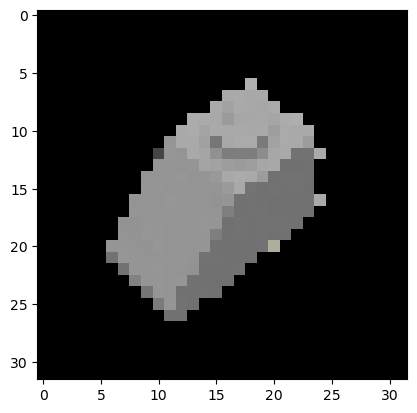

In [6]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt


img = load_img("LEGO/valid/3040 Roof Tile 1x2x45deg/201706162106-0019.png",
               color_mode='rgb',
               target_size=(32,32)
              )


plt.imshow(img)

In [7]:
#Convert the image to array
single_image = img_to_array(img)

#Also divide the image values by 255 to normalize
img_rank4 = np.expand_dims(single_image/255, axis=0)

model.predict(img_rank4)

1/1 [==============================] - 0s 139ms/step


array([[7.9132128e-08, 8.9622965e-08, 2.4383884e-02, 1.3526691e-03,
        5.9248275e-01, 1.4114248e-06, 1.4302272e-01, 5.5806645e-06,
        7.9589711e-08, 2.3871271e-01, 8.5317133e-06, 5.9551156e-11,
        2.9016839e-10, 5.4771204e-10, 4.4006965e-06, 2.5133082e-05]],
      dtype=float32)

In [8]:
np.round(model.predict(img_rank4),2)

1/1 [==============================] - 0s 32ms/step


array([[0.  , 0.  , 0.02, 0.  , 0.59, 0.  , 0.14, 0.  , 0.  , 0.24, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [9]:
# We can predict the class directly using the following function:

np.argmax(model.predict(img_rank4), axis=-1)

1/1 [==============================] - 0s 27ms/step


array([4])

In [10]:
# We can retrieve the class labels from the train_generator:

label_map = (train_data.class_indices)

label_map

{'11214 Bush 3M friction with Cross axle': 0,
 '18651 Cross Axle 2M with Snap friction': 1,
 '2357 Brick corner 1x2x2': 2,
 '3003 Brick 2x2': 3,
 '3004 Brick 1x2': 4,
 '3005 Brick 1x1': 5,
 '3022 Plate 2x2': 6,
 '3023 Plate 1x2': 7,
 '3024 Plate 1x1': 8,
 '3040 Roof Tile 1x2x45deg': 9,
 '3069 Flat Tile 1x2': 10,
 '32123 half Bush': 11,
 '3673 Peg 2M': 12,
 '3713 Bush for Cross Axle': 13,
 '3794 Plate 1X2 with 1 Knob': 14,
 '6632 Technic Lever 3M': 15}

In [11]:
# We can retrieve the class label of the prediction:

list(label_map.keys())[np.argmax(model.predict(img_rank4), axis=-1)[0]]

1/1 [==============================] - 0s 27ms/step


'3004 Brick 1x2'